In [10]:
import torch

device = "cuda"
G = torch.load("E:\\Caldron\\LFM\\result\\LFMzabs_0.1_2\\models\\55500G.pth")

In [49]:
def gen_noise_pair():
    z_dim = 100
    batch_size = 2

    noise = torch.zeros((batch_size, z_dim, 1, 1))
    count = 0
    while count < batch_size / 2:
        n1 = torch.randn((z_dim,)) 
        n2 = torch.randn((z_dim,))
        dr = torch.dot(n1[0:z_dim-1], n2[0:z_dim-1])
        n2[z_dim-1] = -dr / n1[z_dim-1]
        if abs(n2[z_dim-1]) > 1.5:
            continue
        else:
            noise[count] = n1.view((z_dim, 1, 1))
            noise[int(count + batch_size / 2)] = n2.view((z_dim, 1, 1))
            count += 1
    
        reve = torch.zeros((1, z_dim, 1, 1))
        reversi = noise[0] * -1
        reve[0] = reversi
        noise = torch.cat((noise, reve))

        reve = torch.zeros((1, z_dim, 1, 1))
        reversi = noise[1] * -1
        reve[0] = reversi
        noise = torch.cat((noise, reve))

    return noise

In [17]:
import torch
import numpy as np
import matplotlib.pyplot as plt

import torchvision.transforms.functional as F


plt.rcParams["savefig.bbox"] = 'tight'


def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fig, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

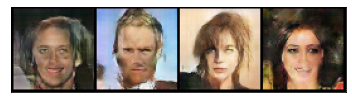

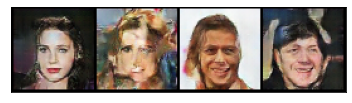

In [52]:
import torchvision
from PIL import Image

for _ in range(2):
    noise = gen_noise_pair().to(device)
    res = G(noise)
    ress = torchvision.utils.make_grid(res, normalize=True)
    show(ress)

In [113]:
def generate_linear():
    walk_step = 3

    noise = torch.zeros((walk_step, 100, 1, 1))
    x1 = torch.randn((100, 1, 1)) 
    x2 = x1
    x1[24] = 1
    x2[24] = -1
    # x2 = x1 * -1

    for i in range(walk_step):
        noise[i] = x1 * i / walk_step + x2 * (1 - i / walk_step)

    return noise

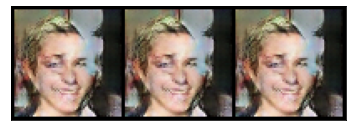

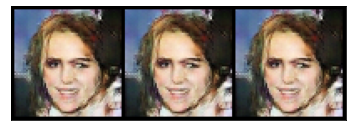

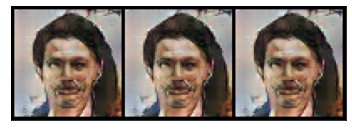

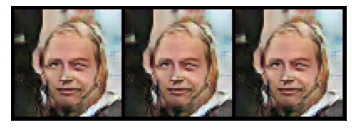

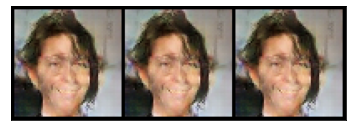

In [114]:
for i in range(5):
    noise = generate_linear().to(device)
    res = G(noise)
    ress = torchvision.utils.make_grid(res, nrow=10, normalize=True)
    show(ress)